# Written problems.

## 1. Lipschitz
Prove the following theorem. <br>
Let $f:R\rightarrow R$ be a continuous and differentiable function. Then $f$ is $k$-Lipschitz if and only if $f'$ is bounded.

## 2. A special function
Apply the theorem to verify that $x^2sin(\frac{1}{x})$ is 3-Lipshitz in $R$.

## 3. Approximation theory with Heaviside
If you are designing a neural network $f$ to approximate $g(x)=x^2sin(\frac{1}{x})$ on the interval $[-1,1]$. <br> For $\epsilon=10^{-6}$,  what would be a reasonable network archetecture if you want $\sup _{x\in[0,1]}|f-g|\le\epsilon$ and $\sigma=Heaviside$? No need to come up with weights and biases of the network.

## 4. Approximation theory with Relu
Given a data set $(x_i, g(x_i))$ with $i=0,\cdots,n$, with $x_0 < x_1 < \cdots< x_n$, define the neural network $f_n$ as
$$f_n(x)=\sum_{i=1}^{n-1}a_iRelu(\frac{x_{i+1}-x}{x_{i+1}-x_i})+a_n$$
where $\alpha=[a_0,a_1,\cdots,a_n]$ is computed by
$$\alpha^T=\begin{bmatrix}
1&-\frac{x_2-x_0}{x_2-x_1}&\frac{x_2-x_0}{x_2-x_1}-1&0&\cdots&0&0&0\\
0&1&-\frac{x_3-x_1}{x_3-x_2}&\frac{x_3-x_1}{x_3-x_2}-1&\cdots&0&0&0\\
0&0&1&-\frac{x_4-x_2}{x_4-x_3}&\cdots&0&0&0\\
\cdots&\cdots&\cdots&\cdots&\cdots&\cdots&\cdots&\cdots\\
0&0&0&0&\cdots&1&-\frac{x_{n-1}-x_{n-3}}{x_{n-1}-x_{n-2}}&\frac{x_{n-1}-x_{n-3}}{x_{n-1}-x_{n-2}}-1\\
0&0&0&0&\cdots&0&1&-1\\
0&0&0&0&\cdots&0&0&1\\
\end{bmatrix}\begin{bmatrix}
g(x_0)\\g(x_1)\\
g(x_2)\\
\cdots\\g(x_n)
\end{bmatrix}.$$
Verify that $f_n$ is a linear interpolation of $g$.

## 5. Deeper is better 
Let f be a neural network with $f=\Delta^{8^2+2}(x)$. Let $g$ be a neural network with 8 layers and $2^8$ nodes.
- How many nodes (exclude the input node) and layers does $f$ have in $[0,1]$? 
- How many peaks does the graph of $f$ have?
- How many affine pieces does the graph of $g$ have?
- Can $f$ be approximated by $g$ with $\int_0^1|f-g|<\frac{1}{32}$? 
- Why? You can apply the theorem directly.

# Coding problems

## 1. Summary.
Summerize the general steps in training a neural network.

## 2. Epidemeology modeling.
Here is the ODE solver using Euler's method and implemented with pytorch tensors.  <br> 

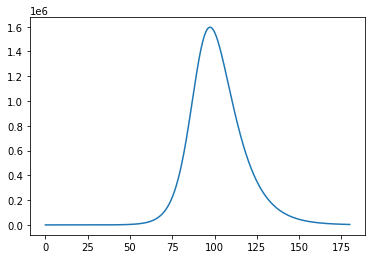

In [20]:
import torch
import matplotlib.pyplot as plt

# parameter values
R0 = torch.tensor(2.4)
t_infective = torch.tensor(5.1 + 3.3)#average recover time = incubation time + recover time, unit is day

# Total population, N. Need to replaced by Arizona population.
N = 7276000
# initial number of infected and recovered individuals
i_initial = torch.tensor(1)
r_initial = torch.tensor(0.00)
s_initial = N - i_initial - r_initial

gamma = 1/t_infective
beta = R0*gamma

#initiate vectors to store results
steps=2000
t = torch.linspace(0, 180, steps=steps)
#step size h
delta_t=t[1]-t[0]
S = torch.zeros(steps)
I = torch.zeros(steps)
R = torch.zeros(steps)
#assign initial values
S[0]=s_initial
I[0]=i_initial
R[0]=r_initial

# SIR model, differential equations.
def sir(x, beta, gamma):
    S, I, R = x
    dsdt = -beta * S * I /N
    didt = beta * S * I /N - gamma * I
    drdt =  gamma * I
    return [dsdt, didt, drdt]

#euler's method implementation
for i in range(steps-1):
    x = S[i],I[i],R[i]
    Sp, Ip, Rp = sir(x, beta, gamma)
    S[i+1] = S[i] + delta_t * Sp
    I[i+1] = I[i] + delta_t * Ip
    R[i+1] = R[i] + delta_t * Rp

plt.plot(t,I)  

- Extend it to the SIHR model in the following. 
\begin{align*}
\frac{dS}{dt} & = -\frac{\beta S I}{N} \\
\frac{dI}{dt} & = \frac{\beta S I}{N} - \gamma I \\
\frac{dH}{dt} & =  \gamma  f I - c  H \\
\frac{dR}{dt} & = \gamma (1-f) I + c  H
\end{align*}
In this model, infected people are progressed to the next stage H (hospitalization) or R (recovered) with the progression rate $\gamma$. Among these people, about $f=1\%$ of them developed sever symtoms and were hospitalized in early 2020. For hospitalization people, the daily recover rate is $c=0.17$. 

- Adjust the infection rate $\beta$ and progression rate $\gamma$ manually (or use other methods if you have a better idea), so the solution $H(t)$ matches the first 180 days of Arizona data you ploted in 'Python assignment 5 Panda dataframe solution' reasonably well. 

- Plot the solution $H(t)$ together with the first 180 days of Arizona hospitalization data together in one figure.

Remark. <br>
Why do we want this? The ODE solver odeint we used only supports numpy array and doesn't allow gradient computation.  
With this torch implementation, methodology development using gradient based algorithms under deep learning framework is possible. <br> 
Keep in mind that one major goal of epidemeology modeling is to determine the parameters $\beta$ and $\gamma$ that fits the actual data and forecast the case number in  the future, it is an optimization problem that gradient based algorithms can apply.

## 3. Class and super class.
- Define a class named Ellipse, which can be constructed by major radius and minor radius. 
- The Ellipse class has two methods which can compute the area and eccentricity. 
- Define a class named Circle, which inherites from the Ellipse class, and make Ellipse to be the superclass. 
- Compute Circle(2).area(), and Circle(2).eccentricity().

## 4. MNIST handwritten digit database training
- Based on the code we developed in class, split 80% of the pictures as training set and the rest to be the test set.
- Plot the arccuracy on the test set for every iteration.
- You can apply Sigmoid or Softmax to the last layer, it's not required.  